In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/2950505226_529e013bf7_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/39271782_b4335d09ae_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/2307673262_e1e1aefd29.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4341530649_c17bbc5d01.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3815322974_52c12dbde3.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/18220342690_f1c20134bd.jpg'),
 PosixPath('datasets/flower_photos/roses/12243069253_e512464095_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14982802401_a3dfb22afb.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2677417735_a697052d2d_n.jpg')]

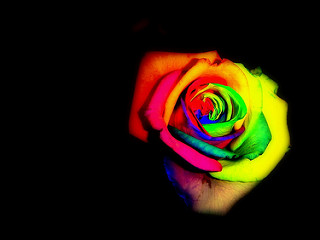

In [ ]:
PIL.Image.open(str(roses[25]))

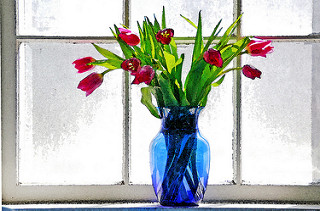

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[67]))

In [ ]:
flowers_images_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulops/*'))
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/18220342690_f1c20134bd.jpg'),
 PosixPath('datasets/flower_photos/roses/12243069253_e512464095_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14982802401_a3dfb22afb.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2677417735_a697052d2d_n.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/18220342690_f1c20134bd.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][5]))

In [ ]:
img.shape

(238, 320, 3)

In [ ]:
cv2.resize(img,(180, 180)).shape

(180, 180, 3)

In [ ]:
x, y = [], []
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (150, 150))
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 0)

In [ ]:
xtrain_scaled = xtrain / 255
xtest_scaled = xtest / 255

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("vertical",
                                                 input_shape=(150,
                                                              150,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(150,
                                                              150,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
num_classes = 5
model = Sequential([
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(xtrain_scaled, ytrain, epochs=30)

Epoch 1/30
68/68 [==============================] - 60s 867ms/step - loss: 1.1629 - accuracy: 0.4747
Epoch 2/30
68/68 [==============================] - 55s 810ms/step - loss: 0.8399 - accuracy: 0.6642
Epoch 3/30
68/68 [==============================] - 55s 810ms/step - loss: 0.6710 - accuracy: 0.7353
Epoch 4/30
68/68 [==============================] - 55s 808ms/step - loss: 0.5419 - accuracy: 0.8003
Epoch 5/30
68/68 [==============================] - 58s 847ms/step - loss: 0.3962 - accuracy: 0.8532
Epoch 6/30
68/68 [==============================] - 55s 810ms/step - loss: 0.2797 - accuracy: 0.9039
Epoch 7/30
68/68 [==============================] - 55s 810ms/step - loss: 0.1972 - accuracy: 0.9322
Epoch 8/30
68/68 [==============================] - 55s 810ms/step - loss: 0.1207 - accuracy: 0.9656
Epoch 9/30
68/68 [==============================] - 55s 813ms/step - loss: 0.0668 - accuracy: 0.9805
Epoch 10/30
68/68 [==============================] - 58s 858ms/step - loss: 0.0471 - accura

In [ ]:
model.evaluate(xtest_scaled,ytest)

23/23 [==============================] - 7s 284ms/step - loss: 2.0602 - accuracy: 0.7535


[2.060202121734619, 0.7534818649291992]

In [ ]:
predictions = model.predict(xtest_scaled)
predictions

23/23 [==============================] - 5s 215ms/step


array([[ 13.803841 ,  62.221825 ,  -3.4972882, -36.592384 , -86.34253  ],
       [ 20.91199  ,   2.4754293,   7.6626306,  -1.0224384, -28.841686 ],
       [ 14.818984 ,   1.3747771,  12.571676 ,  -5.6794906, -19.945667 ],
       ...,
       [  4.9331803,   2.4615142,  13.666832 ,  -6.2489963, -15.234613 ],
       [  9.393978 ,   5.409509 ,   7.0005126,  -3.2088532, -20.684929 ],
       [  7.634972 ,  17.279016 ,  11.380169 , -15.280593 , -30.450504 ]],
      dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

1

In [ ]:
ytest[0]

1

In [ ]:


data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(150,
                                                              150,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)



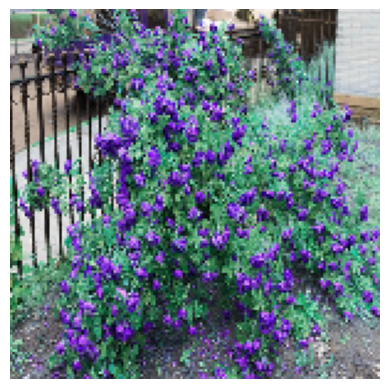

In [ ]:
plt.axis('off')
plt.imshow(x[0])

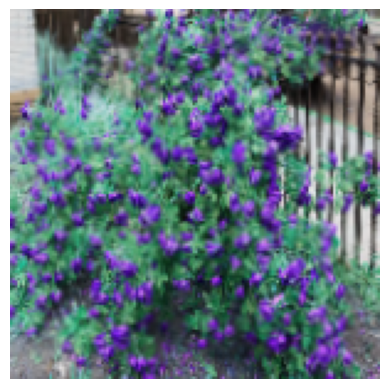

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(xtrain_scaled, ytrain, epochs=30)

Epoch 1/30
68/68 [==============================] - 70s 985ms/step - loss: 1.1427 - accuracy: 0.4826
Epoch 2/30
68/68 [==============================] - 68s 1s/step - loss: 0.8942 - accuracy: 0.6410
Epoch 3/30
68/68 [==============================] - 65s 959ms/step - loss: 0.7818 - accuracy: 0.7000
Epoch 4/30
68/68 [==============================] - 65s 957ms/step - loss: 0.7069 - accuracy: 0.7255
Epoch 5/30
68/68 [==============================] - 66s 979ms/step - loss: 0.6744 - accuracy: 0.7431
Epoch 6/30
68/68 [==============================] - 65s 956ms/step - loss: 0.6527 - accuracy: 0.7469
Epoch 7/30
68/68 [==============================] - 64s 946ms/step - loss: 0.5815 - accuracy: 0.7761
Epoch 8/30
68/68 [==============================] - 64s 941ms/step - loss: 0.5783 - accuracy: 0.7752
Epoch 9/30
68/68 [==============================] - 66s 966ms/step - loss: 0.5262 - accuracy: 0.7975
Epoch 10/30
68/68 [==============================] - 72s 1s/step - loss: 0.5333 - accuracy: 0.

In [ ]:
model.evaluate(xtest_scaled,ytest)

23/23 [==============================] - 7s 282ms/step - loss: 0.5394 - accuracy: 0.8384


[0.5394085049629211, 0.8384401202201843]